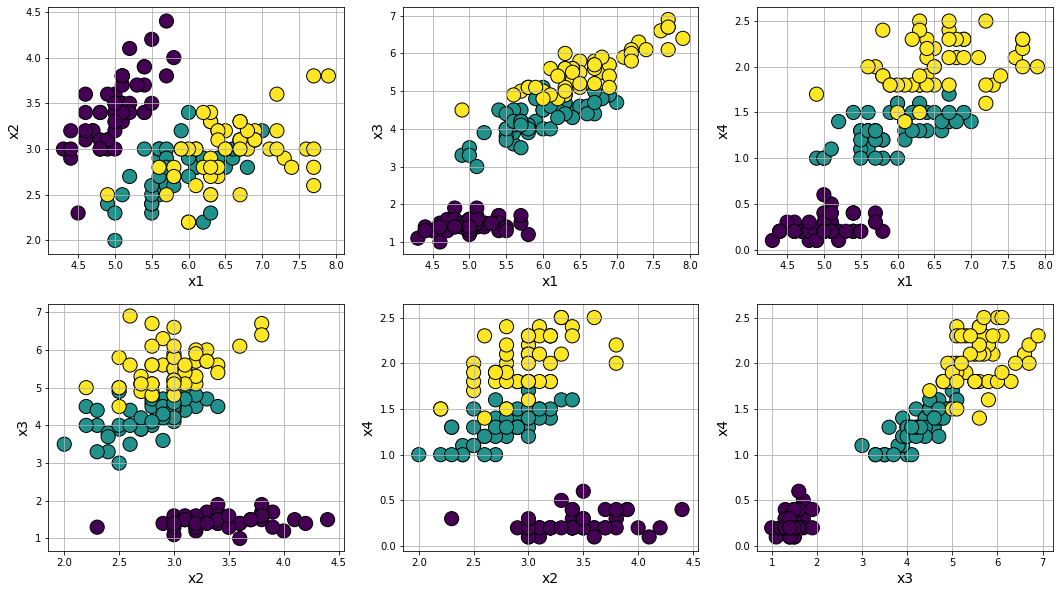

In [8]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from rerf.urerf import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import make_moons

data = datasets.load_iris()
X1 = data['data']
Y = data['target']
df = pd.DataFrame(X1,columns=['x'+str(i) for i in range(1,5)])
df['y'] = data['target']
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X1_df = pd.DataFrame(X1, columns=['dim'+ str(i) for i in range(1,5)])

from itertools import combinations
from math import ceil
lst_var=list(combinations(df.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df[var1],df[var2],s=200,c=df['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.33)

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
Accuracy = []
Accuracy_D = []

std_clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
RF = metrics.accuracy_score(y_test, pred_test_std)
RF

0.98

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
RF_D = metrics.accuracy_score(y_test, pred_test_std)
RF_D

0.92

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
Accuracy = [10]


std_clf = make_pipeline(StandardScaler(), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM1 = metrics.accuracy_score(y_test, pred_test_std)
SVM1

std_clf = make_pipeline(StandardScaler(), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM = metrics.accuracy_score(y_test, pred_test_std)
SVM

std_clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
KNN = metrics.accuracy_score(y_test, pred_test_std)
KNN

Accuracy = [RF, KNN, SVM, SVM1]
Accuracy

[0.98, 0.98, 0.96, 0.94]

In [17]:
Accuracy_D = [10]

std_clf = make_pipeline(StandardScaler(),TruncatedSVD(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
RF_D = metrics.accuracy_score(y_test, pred_test_std)
RF_D

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM1_D = metrics.accuracy_score(y_test, pred_test_std)
SVM1_D

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
SVM_D = metrics.accuracy_score(y_test, pred_test_std)
SVM_D

std_clf = make_pipeline(StandardScaler(), TruncatedSVD(n_components=2), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
KNN_D = metrics.accuracy_score(y_test, pred_test_std)
KNN_D

Accuracy_D = [RF_D, KNN_D, SVM_D, SVM1_D]
Accuracy_D

[0.94, 0.96, 0.94, 0.9]

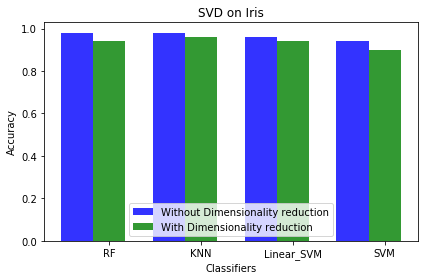

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_classifiers = 4
Accuracy = (0.98, 0.98, 0.96, 0.94)
Accuracy_D = (0.94, 0.96, 0.94, 0.9)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_classifiers)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Accuracy, bar_width,
alpha=opacity,
color='b',
label='Without Dimensionality reduction')

rects2 = plt.bar(index + bar_width, Accuracy_D, bar_width,
alpha=opacity,
color='g',
label='With Dimensionality reduction')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('SVD on Iris')
plt.xticks(index + bar_width, ('RF', 'KNN', 'Linear_SVM', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
PAccuracy_D = [10]
from sklearn.decomposition import PCA

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PRF_D = metrics.accuracy_score(y_test, pred_test_std)
PRF_D

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PSVM1_D = metrics.accuracy_score(y_test, pred_test_std)
PSVM1_D

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PSVM_D = metrics.accuracy_score(y_test, pred_test_std)
PSVM_D

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
PKNN_D = metrics.accuracy_score(y_test, pred_test_std)
PKNN_D

PAccuracy_D = [PRF_D, PKNN_D, PSVM_D, PSVM1_D]
PAccuracy_D

[0.94, 0.96, 0.94, 0.9]

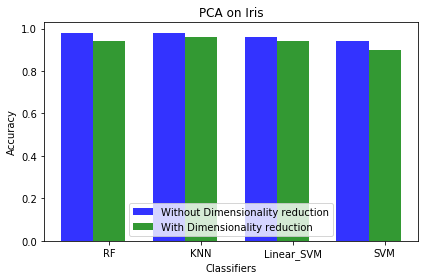

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_classifiers = 4
Accuracy = (0.98, 0.98, 0.96, 0.94)
Accuracy_D = (0.94, 0.96, 0.94, 0.9)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_classifiers)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Accuracy, bar_width,
alpha=opacity,
color='b',
label='Without Dimensionality reduction')

rects2 = plt.bar(index + bar_width, Accuracy_D, bar_width,
alpha=opacity,
color='g',
label='With Dimensionality reduction')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('PCA on Iris')
plt.xticks(index + bar_width, ('RF', 'KNN', 'Linear_SVM', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

std_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MRF_D = metrics.accuracy_score(y_test, pred_test_std)
MRF_D

std_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2), SVC(gamma=2, C=1))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MSVM1_D = metrics.accuracy_score(y_test, pred_test_std)
MSVM1_D

std_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2), SVC(kernel="linear", C=0.025))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MSVM_D = metrics.accuracy_score(y_test, pred_test_std)
MSVM_D

std_clf = make_pipeline(StandardScaler(),LinearDiscriminantAnalysis(n_components=2), KNeighborsClassifier(n_neighbors=5))
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
MKNN_D = metrics.accuracy_score(y_test, pred_test_std)
MKNN_D

MAccuracy_D = [MRF_D, MKNN_D, MSVM_D, MSVM1_D]
MAccuracy_D

[0.98, 0.96, 1.0, 0.96]

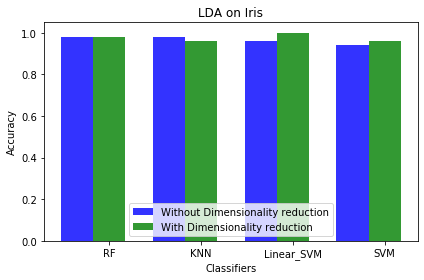

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_classifiers = 4
Accuracy = (0.98, 0.98, 0.96, 0.94)
Accuracy_D = (0.98, 0.96, 1.0, 0.96)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_classifiers)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Accuracy, bar_width,
alpha=opacity,
color='b',
label='Without Dimensionality reduction')

rects2 = plt.bar(index + bar_width, Accuracy_D, bar_width,
alpha=opacity,
color='g',
label='With Dimensionality reduction')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('LDA on Iris')
plt.xticks(index + bar_width, ('RF', 'KNN', 'Linear_SVM', 'SVM'))
plt.legend()

plt.tight_layout()
plt.show()